In [1]:
!pip install ydata-profiling

In [2]:
!pip install scikit-learn

In [3]:
!pip install tensorflow

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

**Data**

So, if you haven’t realized by now a major part of machine learning is data! In fact, it’s so important that most of what we do in this tutorial will focus on exploring, cleaning and selecting appropriate data.

The dataset we will be focusing on here is the titanic dataset. It has tons of information about each passenger on the ship. Our first step is always to understand the data and explore it. So, let’s do that!

Below we will load a dataset and learn how we can explore it using some built-in tools.

In [5]:
# Load dataset.
import pandas as pd
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')


In [6]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [7]:
dftrain

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [8]:
import pandas as pd
from ydata_profiling import ProfileReport

In [9]:
profile = ProfileReport(dftrain, title="Trending Books")

In [10]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 21.57it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [12]:
fasion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fasion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
train_images

(60000, 28, 28)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [24]:
fasion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

# Now you can access the shape of train_images
print(train_images.shape)

(60000, 28, 28)


(60000, 28, 28) represents a collection of 60,000 grayscale images, where each image is 28x28 pixels in size. Grayscale means each pixel is represented by a single intensity value (not RGB).

# If the 6,000 images were RGB instead of grayscale, the shape of the dataset would look like this:
-(60000, 28, 28, 3)

Explanation:
60000: The dataset still contains 60,000 images.
28, 28: Each image is 28x28 pixels in size (height and width).
3: The last dimension represents the 3 color channels (Red, Green, Blue) for RGB images.

In [28]:

train_labels.shape

(60000,)

# proprocess the data

In [33]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

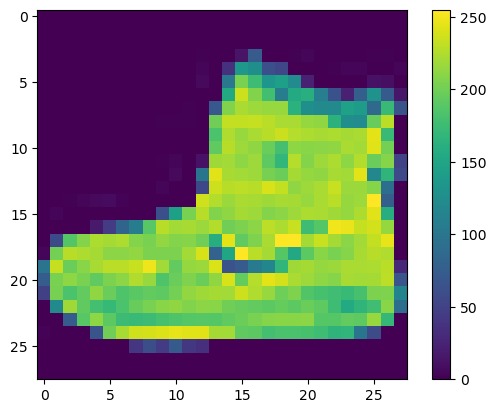

In [32]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [41]:

import nbformat
import sys

# -----------------------------
# 1. Set your notebook file path
# -----------------------------
# Replace this with the path to your notebook file
notebook_path = r"D:\EDOC\Deep-learning\basic deep.ipynb"

# -----------------------------
# 2. Load the notebook
# -----------------------------
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# -----------------------------
# 3. Remove broken widget metadata
# -----------------------------
if "widgets" in nb.get("metadata", {}):
    del nb["metadata"]["widgets"]
    print("🧹 Removed 'metadata.widgets' key")
else:
    print("No 'metadata.widgets' key found — already clean")

# -----------------------------
# 4. Save the cleaned notebook
# -----------------------------
with open(notebook_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("✅ Notebook cleaned successfully! You can push to GitHub now.")


No 'metadata.widgets' key found — already clean
✅ Notebook cleaned successfully! You can push to GitHub now.


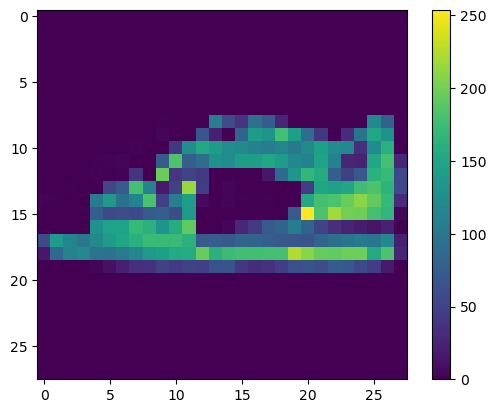

In [43]:
plt.figure()
plt.imshow(train_images[13])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalization in Deep Learning
Normalization is a preprocessing technique used to scale input data so that it falls within a specific range, typically between 0 and 1 or -1 and 1. This ensures that all features contribute equally to the learning process and helps the model converge faster during training.

Why Normalize?
Improves Convergence: Normalized data helps gradient-based optimizers converge faster by ensuring that the scale of the input features is consistent.
Prevents Dominance: Features with larger ranges won't dominate the learning process.
Reduces Sensitivity: Reduces sensitivity to the initialization of weights.

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0


# is done to normalize the pixel values of the images. Here's why:

Reason for Dividing by 255:
Pixel Intensity Range:

In the Fashion MNIST dataset, the pixel values of the images are integers ranging from 0 to 255 (8-bit grayscale images).
0 represents black, and 255 represents white, with values in between representing shades of gray.
Normalization:

Dividing by 255.0 scales the pixel values to the range [0, 1].
This is a common preprocessing step in deep learning to ensure that all input features (in this case, pixel intensities) are on a similar scale.
Benefits of Normalization:

Improves Convergence: Gradient-based optimizers (like SGD, Adam) work better when the input data is normalized, as it avoids large gradients and helps the model converge faster.
Prevents Numerical Instability: Large input values can lead to numerical instability during training.
Equal Contribution: Ensures that all features (pixels) contribute equally to the learning process.

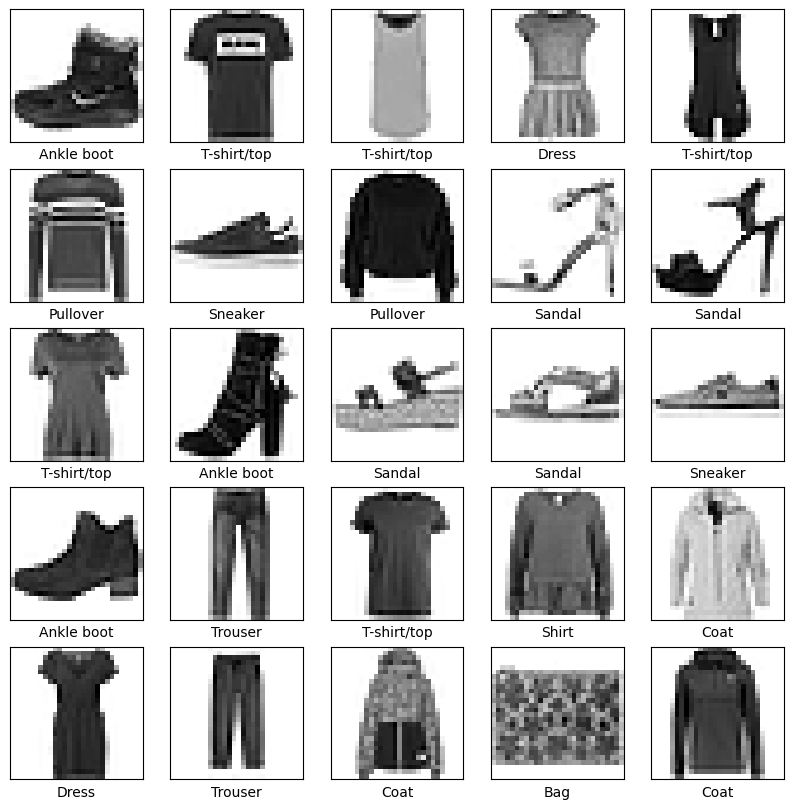

In [45]:
plt.figure(figsize=(10,10))
# A loop that iterates over the first 25 images in the train_images dataset (from index 0 to 24).
for i in range(25):
   #Creates a 5x5 grid of subplots (25 subplots in total).
    #i+1 specifies the position of the current subplot (subplot indices start from 1, not 0).
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()